In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import mylibrary.splinelib_nd as tsn

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [33]:
def initialize3Dplot(X1, X2, Y):
    matplotlib.rcParams['figure.figsize'] = (8, 6)    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X1, X2, Y)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    return ax

In [34]:
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
              'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
             ]
#########################################################        

def plot_triangle(array, c):
    '''
    Array must be shape = (3,2)
    '''
#     X1, X2 = self.X[node.indices][:,0], self.X[node.indices][:,1]
    px1 = np.append(array[:,0], array[:1,0])
    px2 = np.append(array[:,1], array[:1,1])
    plt.plot(px1, px2, lw=2, c=c)    

def plot_piece2D_v0(self:tsn.SplineND):
    depth = 0
    node_list = [self.root]
    matplotlib.rcParams['figure.figsize'] = (12, 10)    
    while(len(node_list) >0 ):
        node = node_list.pop()
        X = self.X[node.indices]
        plot_triangle(X, color_list[depth])
        depth+=1
        
        if node.is_branch:
            for spn in node.splitNodes:
                node_list.append(spn)
        continue
    return
#########################################################        
def plot_tristar(corners, pointx, pointy, line_color):
    for corner in corners:
#         plt.plot(corner[0], corner[1], point[0], point[1], color=color)
        plt.plot([corner[0], pointx[0]], [corner[1], pointx[1]], color=line_color)
    plt.scatter([pointx[0]], [pointx[1]], c=pointy)
        
        
def plot_piece2D_v1(self:tsn.SplineND):
    depth = 0
    matplotlib.rcParams['figure.figsize'] = (12, 10)
    
    X_ = self.X[self.root.indices]
    Y_ = self.Y[self.root.indices]
    plot_triangle(X_, c='r')
    plt.scatter(X_[:,0], X_[:,1], c=Y_.reshape(-1))
        
    node_list = [self.root]
    while(len(node_list) >0 ):
        node = node_list.pop()
        if not node.is_branch: continue
            
        corners = self.X[node.indices]
        pointx = self.X[node.split_index]
        pointy = self.Y[node.split_index]
        plot_tristar(corners, pointx, pointy, color_list[depth])
        
        depth+=1
        if node.is_branch:
            for spn in node.splitNodes:
                node_list.append(spn)
        continue
    return

In [65]:
num_points = 50
X1 = np.linspace(-2.5, 2.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
X1 = X1.reshape(-1)
X2 = X2.reshape(-1)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

XX = np.c_[X1, X2]
YY = Y.reshape(-1,1)

In [66]:
%matplotlib tk
fig = initialize3Dplot(X1, X2, Y)
plt.show()

In [67]:
# %matplotlib inline
# plt.scatter(X1, X2, c=Y)

### For 3D data

In [68]:
piece2D = tsn.SplineND(2)

In [69]:
piece2D.make_root_global_coverage2(XX)
# piece2D.Y = np.array([1,-1,-3])

In [70]:
# %matplotlib inline
# plt.scatter(X1, X2, c=Y)
# px1 = np.append(piece2D.X[:,0], piece2D.X[:1,0])
# px2 = np.append(piece2D.X[:,1], piece2D.X[:1,1])

# plt.plot(px1, px2, lw=1, c='r')

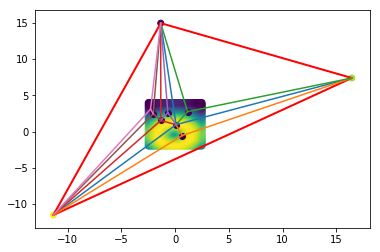

In [96]:
%matplotlib inline
plt.scatter(X1, X2, c=Y)
plot_piece2D_v1(piece2D)
plt.show()

In [88]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
perror = 9999999.
for epoch in range(100000):
    yout = piece2D.forward(XX)
    dy = yout - YY
    dx = piece2D.backward(dy)
    
    piece2D.update(0.3)
    
#     if epoch%100 == 0 and epoch !=0:
#         piece2D.make_root_global_coverage2()
#         piece2D.add_new_point()

    if epoch%10 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        if error > perror :
            print('???????\n^^^^^^^')
            break
        perror = error
        
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
#         ax.scatter(piece2D.X[:,0], piece2D.X[:,1], piece2D.Y, lw=5, c='r')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.9058394274163929
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
10 Error =  0.8674027811451153
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
20 Error =  0.8374540749420821


TclError: invalid command name "pyimage233"

In [91]:
err, node = piece2D.root.get_maximum_error_node()
err, node.indices

--- 3.2703188942953596
--- 2.8475994426584292
--- 2.6993211346710377
3.2703188942953596
--- 3.2703188942953596
--- 3.113931974609053
--- 2.9656536666216615
3.2703188942953596
--- 3.2703188942953596
--- 3.0016029755100453
--- 2.8603592380816005
--- 2.5667650269896427
3.0016029755100453
--- 3.0016029755100453
--- 3.2430572151540256
3.2703188942953596


(3.2703188942953596, [0, 1, 5])

In [95]:
piece2D.add_new_point()

--- 3.030952520070669
--- 2.478060347587034
--- 2.3297820395996425
3.030952520070669
--- 3.030952520070669
--- 2.8475994426584292
--- 2.6993211346710377
3.030952520070669
--- 3.030952520070669
--- 2.5367533598067586
--- 2.4005935487028394
--- 1.9657556001824372
2.5367533598067586
--- 2.5367533598067586
--- 2.9656536666216615
3.030952520070669
--- 3.030952520070669
--- 3.0016029755100453
--- 2.8603592380816005
--- 2.5667650269896427
3.0016029755100453
--- 3.0016029755100453
--- 2.6293568147158615
--- 2.4881130772874167
--- 2.3427971741828504
2.6293568147158615
--- 2.6293568147158615
3.030952520070669


ValueError: all the input arrays must have same number of dimensions

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

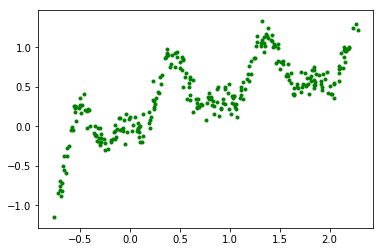

In [43]:
x = np.linspace(0,2,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = (x - 0.5)*1.5 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [51]:
piece = tsn.SplineND(1)
piece.make_root_global_coverage2(xx)

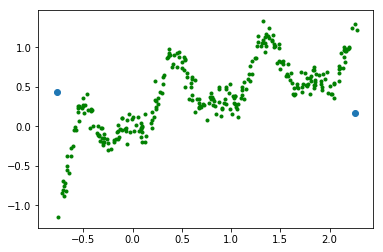

In [52]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(piece.X, piece.Y)

In [53]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):

    Y = piece.forward(xx)
    
    dy = Y-yy
    dx = piece.backward(dy)
    piece.update(0.3)
    
    if step % 100 == 0:
#         piece.make_root_global_coverage2()
        piece.add_new_point()

        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, dy, marker='.', color='m')
        
        plt.scatter(x, Y.reshape(-1), marker='.', color='r')        
        plt.plot(piece.X, piece.Y, marker='.', color='r', lw=2)
        
        plt.scatter(x, dx, marker='.', color='c')
        
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
Steps 0
Error 0.2607111570686604


_______________________
Steps 10
Error 0.15114396351419812


_______________________
Steps 20
Error 0.11431492905078457


_______________________
Steps 30
Error 0.10087130200790284


_______________________
Steps 40
Error 0.09078333489731262


_______________________
Steps 50
Error 0.08827211595545811


_______________________
Steps 60
Error 0.0871407687932213


_______________________
Steps 70
Error 0.08663950065511229


_______________________
Steps 80
Error 0.08643341254704548


_______________________
Steps 90
Error 0.08637718358158156


--- 1.4971416084349907
--- 1.098253945570954
1.4971416084349907
_______________________
Steps 100
Error 0.08640029253193918


_______________________
Steps 110
Error 0.08604529275176193


_______________________
Steps 120
Error 0.08594550625670422


_______________________
Steps 130
Error 0.08596974176323045


_______________________
Steps 140
Error 0.08605307783566907


___________________

TclError: invalid command name "pyimage156"

In [ ]:
# piece.add_new_point()
# spiece.X.shape

In [ ]:
# err, node = piece.root.get_maximum_error_node()
# print(err, node.indices)

In [ ]:
# piece.root.break_region()
# print(piece.root.splitNodes[0].indices)
# print(piece.del_Y.shape)

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
# plt.scatter(x, Y.reshape(-1), marker='.', color='m')
plt.plot(piece.X, piece.Y, marker='.', color='r')

In [ ]:
# piece.make_root_global_coverage(xx) ## this caused the function to change 
# plt.scatter(x, y, marker='.', color='g')
# plt.plot(piece.X, piece.Y, marker='.', color='r')